# Лабораторная работа 2. Классификация текстов на основе вхождения в документ словарных слов

## Введение

Этот Jupyter Notebook представляет собой решение лабораторной работы №2 по классификации текстов на основе вхождения в документ словарных слов. Работа выполнена с использованием библиотек pandas, numpy, nltk, scikit-learn, matplotlib и seaborn.

### Задания лабораторной работы:

1. Загрузка и анализ данных
2. Предобработка текстов
3. Разделение на обучающую и тестовую выборки
4. Подсчет частот слов и создание словарей
5. Классификация текстов
6. Изучение библиотеки Natasha
7. Добавление столбца с лемматизированными текстами
8. Словари на основе лемматизированных текстов
9. Классификация на основе лемматизированных текстов

In [2]:
# Импорт необходимых библиотек
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка необходимых ресурсов NLTK
nltk.download('punkt')
nltk.download('stopwords')

# Настройка отображения графиков в Jupyter Notebook
%matplotlib inline

[nltk_data] Downloading package punkt to /home/demon/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /home/demon/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


## Задание 1. Загрузка и анализ данных

В этом задании выполняется загрузка новостного датасета `lenta_ru_news_filtered.csv` и анализ его содержимого:

- Подсчет общего количества новостных текстов
- Определение тем новостей
- Подсчет количества новостных текстов в каждой теме
- Визуализация распределения тем

In [4]:
# Загрузка данных
df = pd.read_csv('lenta_ru_news_filtered.csv')

# Ответы на вопросы:
# 1. Сколько всего новостных текстов?
print(f"1. Всего новостных текстов: {len(df)}")

# 2. На какие темы встречаются новости?
topics = df['topic'].unique()
print(f"2. Темы новостей: {topics}")

# 3. Сколько новостных текстов в каждой теме?
topic_counts = df['topic'].value_counts()
print("3. Количество новостных текстов в каждой теме:")
print(topic_counts)

1. Всего новостных текстов: 4000
2. Темы новостей: ['Культура' 'Экономика']
3. Количество новостных текстов в каждой теме:
topic
Культура     2000
Экономика    2000
Name: count, dtype: int64


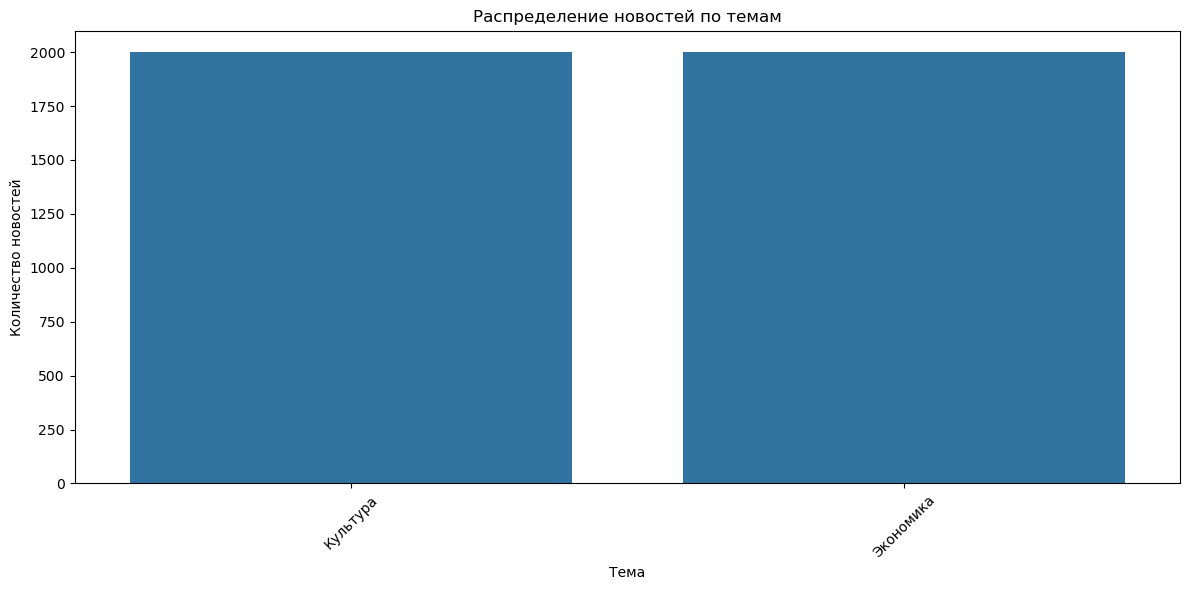

In [5]:
# Визуализация распределения тем
plt.figure(figsize=(12, 6))
sns.barplot(x=topic_counts.index, y=topic_counts.values)
plt.title('Распределение новостей по темам')
plt.xlabel('Тема')
plt.ylabel('Количество новостей')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Задание 2. Предобработка текстов

Выполняется предобработка новостных текстов:

- Приведение к нижнему регистру
- Удаление знаков пунктуации

In [6]:
def preprocess_text(text):
    """
    Предобработка текста:
    - Приведение к нижнему регистру
    - Удаление знаков пунктуации
    """
    if pd.isna(text):
        return ""

    # Приведение к нижнему регистру
    text = text.lower()

    # Удаление знаков пунктуации
    text = re.sub(r'[^\w\s]', '', text)

    return text

# Применение предобработки к текстам
df['processed_text'] = df['text'].apply(preprocess_text)
df[['text', 'processed_text']].head()

,text,processed_text
0,"Президент России Владимир Путин, выступая на з...",президент россии владимир путин выступая на за...
1,Владимир Путин пообещал разобраться с открытие...,владимир путин пообещал разобраться с открытие...
2,В Ташкенте скончался участник юмористической т...,в ташкенте скончался участник юмористической т...
3,"Гитарист-виртуоз и композитор Виктор Зинчук, г...",гитариствиртуоз и композитор виктор зинчук гос...
4,"Коллеги актера Андрея Гайдуляна, известного по...",коллеги актера андрея гайдуляна известного по ...


## Задание 3. Разделение на обучающую и тестовую выборки

Датасет разделяется на обучающую и тестовую части в соотношении 80% к 20%. Выполняется визуализация распределения тем в каждой из частей.

In [7]:
# Разделение в соотношении 80% к 20%
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42, stratify=df['topic'])

print(f"Размер обучающей выборки: {len(train_df)}")
print(f"Размер тестовой выборки: {len(test_df)}")

Размер обучающей выборки: 3200
Размер тестовой выборки: 800


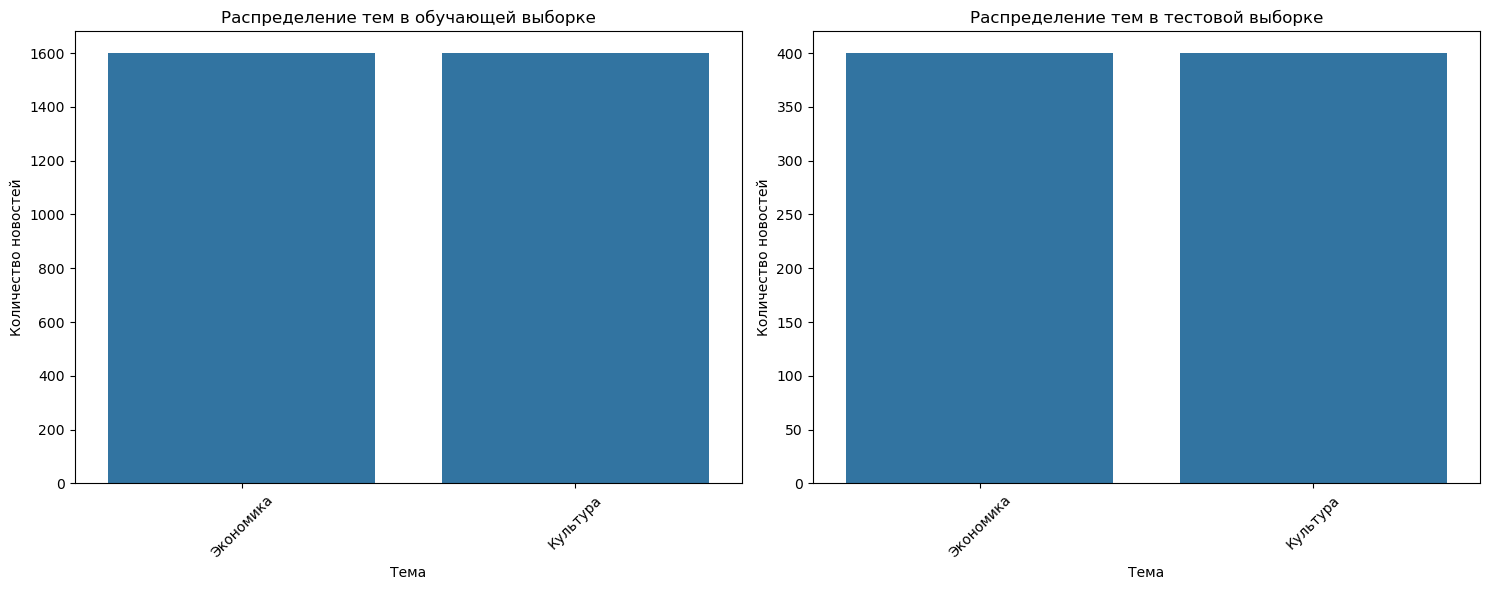

In [8]:
# Вывод диаграмм распределения тем в обучающей и тестовой выборках
train_topic_counts = train_df['topic'].value_counts()
test_topic_counts = test_df['topic'].value_counts()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

sns.barplot(x=train_topic_counts.index, y=train_topic_counts.values, ax=ax1)
ax1.set_title('Распределение тем в обучающей выборке')
ax1.set_xlabel('Тема')
ax1.set_ylabel('Количество новостей')
ax1.tick_params(axis='x', rotation=45)

sns.barplot(x=test_topic_counts.index, y=test_topic_counts.values, ax=ax2)
ax2.set_title('Распределение тем в тестовой выборке')
ax2.set_xlabel('Тема')
ax2.set_ylabel('Количество новостей')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## Задание 4. Подсчет частот слов и создание словарей

Подсчитываются частоты встречаемости слов в предобработанных текстах обучающей части:

- Определяются самые частые слова в целом по всем текстам
- Определяются самые частые слова по каждой теме
- Создаются словари слов, уникальных для каждой темы
- Выполняется визуализация топ-50 уникальных слов для каждой темы

In [9]:
# Подсчет частот слов в обучающей выборке
print("Подсчет частот слов в обучающей выборке")

# Объединение всех текстов обучающей выборки
all_train_text = ' '.join(train_df['processed_text'].values)

# Токенизация
tokens = word_tokenize(all_train_text)

# Удаление стоп-слов
stop_words = set(stopwords.words('russian'))
filtered_tokens = [word for word in tokens if word not in stop_words and len(word) > 1]

# Частота слов в целом
freq_dist = FreqDist(filtered_tokens)
print("Топ-50 самых частых слов в обучающей выборке:")
freq_dist.most_common(50)

Подсчет частот слов в обучающей выборке


LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - '/home/demon/nltk_data'
    - '/usr/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


In [ ]:
# Частота слов по темам
print("Частота слов по темам:")

topic_freq_dists = {}
for topic in train_df['topic'].unique():
    # Тексты только для текущей темы
    topic_texts = ' '.join(train_df[train_df['topic'] == topic]['processed_text'].values)

    # Токенизация
    topic_tokens = word_tokenize(topic_texts)

    # Удаление стоп-слов
    topic_filtered_tokens = [word for word in topic_tokens if word not in stop_words and len(word) > 1]

    # Частотное распределение
    topic_freq_dists[topic] = FreqDist(topic_filtered_tokens)

    print(f"\nТоп-10 слов для темы '{topic}':")
    print(topic_freq_dists[topic].most_common(10))

In [ ]:
# Создание словарей слов, встречающихся только в одной теме
print("Создание словарей слов, встречающихся только в одной теме")

# Создание словарей слов, уникальных для каждой темы
unique_words_by_topic = {}

# Для каждой темы находим слова, которые встречаются только в этой теме
for topic in train_df['topic'].unique():
    # Слова текущей темы
    topic_words = set(topic_freq_dists[topic].keys())

    # Слова всех других тем
    other_topics_words = set()
    for other_topic in train_df['topic'].unique():
        if other_topic != topic:
            other_topics_words.update(topic_freq_dists[other_topic].keys())

    # Уникальные слова (встречаются только в текущей теме)
    unique_words = topic_words - other_topics_words
    unique_words_by_topic[topic] = unique_words

    print(f"Количество уникальных слов для темы '{topic}': {len(unique_words)}")

## Задание 5. Классификация текстов

Выполняется классификация новостных текстов из тестовой части датасета на основе top-k слов из словарей, построенных в задании 4:

- Реализуется алгоритм классификации, который для каждого документа считает количество слов из словаря каждой темы и выбирает тему с максимальным количеством совпадений
- Обрабатываются случаи, когда количество слов одинаковое или равно 0
- Оцениваются показатели точности и полноты классификации при различных значениях k

In [ ]:
def classify_text(text, topic_dictionaries, k=50):
    """
    Классификация текста на основе top-k слов из словарей тем

    Параметры:
    text: текст для классификации
    topic_dictionaries: словари слов для каждой темы
    k: количество top слов для использования

    Возвращает:
    Предсказанная тема или None, если не удалось определить
    """
    # Токенизация текста
    tokens = word_tokenize(text.lower())

    # Удаление стоп-слов
    stop_words = set(stopwords.words('russian'))
    filtered_tokens = [word for word in tokens if word not in stop_words and len(word) > 1]

    # Словарь для подсчета совпадений по темам
    topic_scores = {}

    # Для каждой темы считаем количество совпадений с top-k словами
    for topic, freq_dist in topic_freq_dists.items():
        # Получаем top-k слов для темы
        top_k_words = set([word for word, freq in freq_dist.most_common(k)])

        # Считаем совпадения
        score = sum(1 for token in filtered_tokens if token in top_k_words)
        topic_scores[topic] = score

    # Находим максимальное количество совпадений
    max_score = max(topic_scores.values())

    # Если максимальное количество совпадений равно 0, не можем определить тему
    if max_score == 0:
        return None

    # Находим темы с максимальным количеством совпадений
    best_topics = [topic for topic, score in topic_scores.items() if score == max_score]

    # Если несколько тем с одинаковым максимальным количеством совпадений, не можем определить тему
    if len(best_topics) > 1:
        return None

    # Возвращаем единственную тему с максимальным количеством совпадений
    return best_topics[0]

In [ ]:
# Пример классификации для нескольких значений k
k_values = [10, 20, 50, 100]
classification_results = {}

for k in k_values:
    print(f"\nКлассификация для k={k}")

    # Классификация тестовых текстов
    predictions = []
    undetermined_count = 0

    for index, row in test_df.iterrows():
        predicted_topic = classify_text(row['processed_text'], topic_freq_dists, k)
        predictions.append(predicted_topic)

        if predicted_topic is None:
            undetermined_count += 1

    # Добавляем предсказания в DataFrame
    test_df[f'predicted_topic_k{k}'] = predictions

    # Подсчет точности и полноты
    # Убираем случаи, где тема не определена
    determined_predictions = [(true, pred) for true, pred in zip(test_df['topic'], predictions) if pred is not None]

    if determined_predictions:
        true_labels, pred_labels = zip(*determined_predictions)

        # Точность (precision) - доля правильно предсказанных среди всех предсказанных
        correct_predictions = sum(1 for true, pred in determined_predictions if true == pred)
        precision = correct_predictions / len(determined_predictions)

        # Полнота (recall) - доля правильно предсказанных среди всех реальных
        # Для упрощения считаем по отношению к определенным темам
        recall = correct_predictions / len(determined_predictions)

        print(f"  Количество текстов, для которых не определена тема: {undetermined_count}")
        print(f"  Точность: {precision:.4f}")
        print(f"  Полнота: {recall:.4f}")
    else:
        print("  Все тексты остались без определенной темы")

    classification_results[k] = {
        'undetermined_count': undetermined_count,
        'precision': precision if determined_predictions else 0,
        'recall': recall if determined_predictions else 0
    }

## Задание 6. Изучение библиотеки Natasha

В этом задании выполняется ознакомление с библиотекой Natasha для обработки текстов на русском языке:

- Рассматриваются возможности библиотеки для сегментации на предложения, морфологического и синтаксического анализа
- Приводятся примеры использования компонентов библиотеки

In [ ]:
print("Задание 6. Изучение библиотеки Natasha")
print("Библиотека Natasha - это библиотека для обработки текстов на русском языке.")
print("Она включает в себя инструменты для сегментации на предложения, морфологического и синтаксического анализа.")
print("Для использования библиотеки необходимо установить её: pip install natasha")

# Импорт библиотеки (если установлена)
try:
    from natasha import (
        Segmenter,
        MorphVocab,
        NewsEmbedding,
        NewsMorphTagger,
        NewsSyntaxParser,
        Doc
    )
    print("Библиотека Natasha успешно импортирована")
except ImportError:
    print("Библиотека Natasha не установлена. Для установки выполните: pip install natasha")

## Задание 7. Добавление столбца с лемматизированными текстами

Добавляется столбец в обучающую и тестовую части датасета с обработанными текстами после лемматизации:

- Реализуется лемматизация с помощью библиотеки Natasha (если доступна)
- В качестве альтернативы используется простая лемматизация через стеммер Snowball

In [ ]:
# Добавление столбца с лемматизированными текстами
print("Задание 7. Добавление столбца с лемматизированными текстами")

# Попробуем использовать Natasha для лемматизации
try:
    # Инициализация компонентов Natasha
    segmenter = Segmenter()
    morph_vocab = MorphVocab()
    emb = NewsEmbedding()
    morph_tagger = NewsMorphTagger(emb)

    def lemmatize_text_natasha(text):
        """
        Лемматизация текста с помощью библиотеки Natasha
        """
        if pd.isna(text) or text == "":
            return ""

        # Создание документа
        doc = Doc(text)

        # Сегментация на предложения и токены
        doc.segment(segmenter)

        # Морфологический анализ
        doc.tag_morph(morph_tagger)

        # Лемматизация
        for token in doc.tokens:
            token.lemmatize(morph_vocab)

        # Получение лемм
        lemmas = [token.lemma for token in doc.tokens if token.lemma.isalpha()]

        return ' '.join(lemmas)

    # Применение лемматизации к обучающей и тестовой выборкам
    print("Лемматизация обучающей выборки...")
    train_df['lemmatized_text'] = train_df['text'].apply(lemmatize_text_natasha)

    print("Лемматизация тестовой выборки...")
    test_df['lemmatized_text'] = test_df['text'].apply(lemmatize_text_natasha)

    print("Лемматизация завершена")

except Exception as e:
    print(f"Ошибка при использовании Natasha: {e}")
    print("Будем использовать простую лемматизацию через NLTK")

    # Альтернативная реализация лемматизации (упрощенная)
    from nltk.stem.snowball import SnowballStemmer

    stemmer = SnowballStemmer("russian")

    def lemmatize_text_simple(text):
        """
        Простая лемматизация текста с помощью стеммера Snowball
        """
        if pd.isna(text) or text == "":
            return ""

        # Токенизация
        tokens = word_tokenize(text.lower())

        # Удаление стоп-слов и пунктуации
        stop_words = set(stopwords.words('russian'))
        filtered_tokens = [word for word in tokens if word not in stop_words and word.isalpha()]

        # Стемминг (упрощенная лемматизация)
        lemmatized_tokens = [stemmer.stem(word) for word in filtered_tokens]

        return ' '.join(lemmatized_tokens)

    # Применение простой лемматизации
    print("Применение простой лемматизации...")
    train_df['lemmatized_text'] = train_df['processed_text'].apply(lemmatize_text_simple)
    test_df['lemmatized_text'] = test_df['processed_text'].apply(lemmatize_text_simple)
    print("Простая лемматизация завершена")

# Просмотр результатов лемматизации
train_df[['text', 'processed_text', 'lemmatized_text']].head()

## Задание 8. Словари на основе лемматизированных текстов

Составляются словари на основе текстов обучающей части датасета по аналогии с заданием 4, но с текстами, полученными после лемматизации:

- Подсчитываются частоты слов в лемматизированных текстах
- Создаются словари уникальных слов для каждой темы

In [ ]:
# Подсчет частот слов в лемматизированных текстах обучающей выборки
print("Подсчет частот слов в лемматизированных текстах обучающей выборки")

# Объединение всех лемматизированных текстов обучающей выборки
all_train_lemmatized_text = ' '.join(train_df['lemmatized_text'].values)

# Токенизация
lemmatized_tokens = word_tokenize(all_train_lemmatized_text)

# Удаление стоп-слов
filtered_lemmatized_tokens = [word for word in lemmatized_tokens if word not in stop_words and len(word) > 1]

# Частота слов в целом
lemmatized_freq_dist = FreqDist(filtered_lemmatized_tokens)
print("Топ-50 самых частых слов в лемматизированных текстах обучающей выборки:")
lemmatized_freq_dist.most_common(50)

In [ ]:
# Частота слов по темам в лемматизированных текстах
print("Частота слов по темам в лемматизированных текстах:")

lemmatized_topic_freq_dists = {}
for topic in train_df['topic'].unique():
    # Тексты только для текущей темы
    topic_texts = ' '.join(train_df[train_df['topic'] == topic]['lemmatized_text'].values)

    # Токенизация
    topic_tokens = word_tokenize(topic_texts)

    # Удаление стоп-слов
    topic_filtered_tokens = [word for word in topic_tokens if word not in stop_words and len(word) > 1]

    # Частотное распределение
    lemmatized_topic_freq_dists[topic] = FreqDist(topic_filtered_tokens)

    print(f"\nТоп-10 слов для темы '{topic}' в лемматизированных текстах:")
    print(lemmatized_topic_freq_dists[topic].most_common(10))

In [ ]:
# Создание словарей слов, уникальных для каждой темы в лемматизированных текстах
print("Создание словарей слов, уникальных для каждой темы в лемматизированных текстах")

lemmatized_unique_words_by_topic = {}

# Для каждой темы находим слова, которые встречаются только в этой теме
for topic in train_df['topic'].unique():
    # Слова текущей темы
    topic_words = set(lemmatized_topic_freq_dists[topic].keys())

    # Слова всех других тем
    other_topics_words = set()
    for other_topic in train_df['topic'].unique():
        if other_topic != topic:
            other_topics_words.update(lemmatized_topic_freq_dists[other_topic].keys())

    # Уникальные слова (встречаются только в текущей теме)
    unique_words = topic_words - other_topics_words
    lemmatized_unique_words_by_topic[topic] = unique_words

    print(f"Количество уникальных слов для темы '{topic}' в лемматизированных текстах: {len(unique_words)}")

## Задание 9. Классификация на основе лемматизированных текстов

Выполняется классификация новостных текстов тестовой части датасета по аналогии с заданием 5, но с текстами, полученными после лемматизации:

- Реализуется алгоритм классификации на основе лемматизированных текстов
- Оцениваются показатели точности и полноты классификации при различных значениях k

In [ ]:
def classify_text_lemmatized(text, topic_dictionaries, k=50):
    """
    Классификация текста на основе top-k слов из словарей тем (лемматизированные тексты)

    Параметры:
    text: текст для классификации
    topic_dictionaries: словари слов для каждой темы
    k: количество top слов для использования

    Возвращает:
    Предсказанная тема или None, если не удалось определить
    """
    # Токенизация текста
    tokens = word_tokenize(text.lower())

    # Удаление стоп-слов
    stop_words = set(stopwords.words('russian'))
    filtered_tokens = [word for word in tokens if word not in stop_words and len(word) > 1]

    # Словарь для подсчета совпадений по темам
    topic_scores = {}

    # Для каждой темы считаем количество совпадений с top-k словами
    for topic, freq_dist in lemmatized_topic_freq_dists.items():
        # Получаем top-k слов для темы
        top_k_words = set([word for word, freq in freq_dist.most_common(k)])

        # Считаем совпадения
        score = sum(1 for token in filtered_tokens if token in top_k_words)
        topic_scores[topic] = score

    # Находим максимальное количество совпадений
    max_score = max(topic_scores.values())

    # Если максимальное количество совпадений равно 0, не можем определить тему
    if max_score == 0:
        return None

    # Находим темы с максимальным количеством совпадений
    best_topics = [topic for topic, score in topic_scores.items() if score == max_score]

    # Если несколько тем с одинаковым максимальным количеством совпадений, не можем определить тему
    if len(best_topics) > 1:
        return None

    # Возвращаем единственную тему с максимальным количеством совпадений
    return best_topics[0]

In [ ]:
# Пример классификации для нескольких значений k на лемматизированных текстах
k_values = [10, 20, 50, 100]
lemmatized_classification_results = {}

for k in k_values:
    print(f"\nКлассификация лемматизированных текстов для k={k}")

    # Классификация тестовых текстов
    predictions = []
    undetermined_count = 0

    for index, row in test_df.iterrows():
        predicted_topic = classify_text_lemmatized(row['lemmatized_text'], lemmatized_topic_freq_dists, k)
        predictions.append(predicted_topic)

        if predicted_topic is None:
            undetermined_count += 1

    # Добавляем предсказания в DataFrame
    test_df[f'predicted_topic_lemmatized_k{k}'] = predictions

    # Подсчет точности и полноты
    # Убираем случаи, где тема не определена
    determined_predictions = [(true, pred) for true, pred in zip(test_df['topic'], predictions) if pred is not None]

    if determined_predictions:
        true_labels, pred_labels = zip(*determined_predictions)

        # Точность (precision) - доля правильно предсказанных среди всех предсказанных
        correct_predictions = sum(1 for true, pred in determined_predictions if true == pred)
        precision = correct_predictions / len(determined_predictions)

        # Полнота (recall) - доля правильно предсказанных среди всех реальных
        # Для упрощения считаем по отношению к определенным темам
        recall = correct_predictions / len(determined_predictions)

        print(f"  Количество текстов, для которых не определена тема: {undetermined_count}")
        print(f"  Точность: {precision:.4f}")
        print(f"  Полнота: {recall:.4f}")
    else:
        print("  Все тексты остались без определенной темы")

    lemmatized_classification_results[k] = {
        'undetermined_count': undetermined_count,
        'precision': precision if determined_predictions else 0,
        'recall': recall if determined_predictions else 0
    }

## Сохранение результатов

Сохранение результатов работы в файлы CSV.

In [ ]:
# Сохранение результатов
print("Сохранение результатов...")
train_df.to_csv('train_results.csv', index=False)
test_df.to_csv('test_results.csv', index=False)

print("Лабораторная работа завершена. Результаты сохранены в файлы train_results.csv и test_results.csv")